In [3]:
import pandas as pd
import re
import glob
import seaborn as sns

In [4]:
#Read the data
df = pd.read_csv("StateNames.csv")

Text(0.5, 0.98, 'after1990')

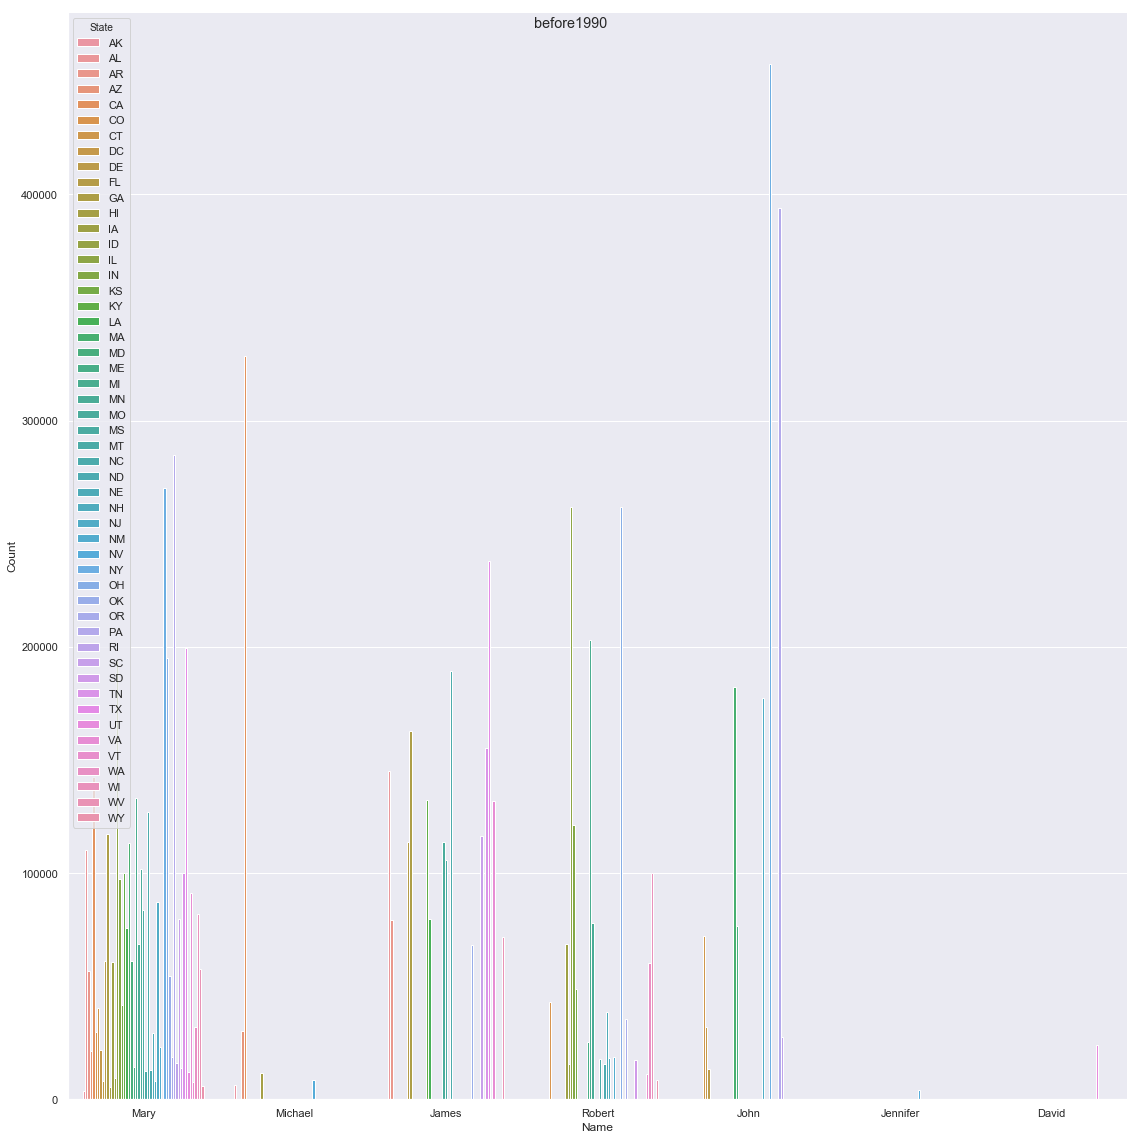

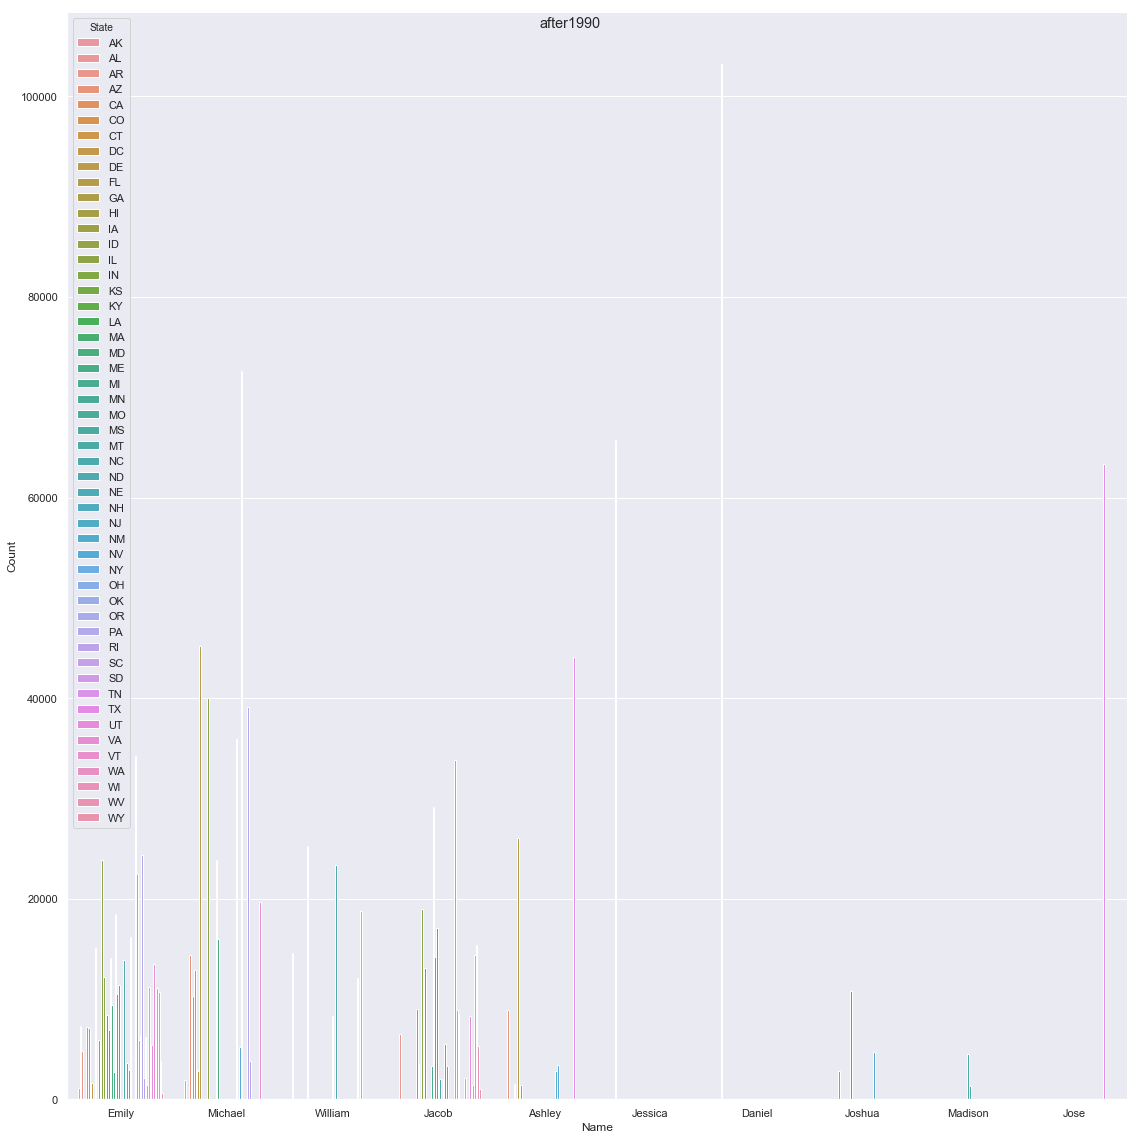

In [36]:
#agregate the data
df_before1990 = df[df.Year<1990].groupby(by=['State','Gender','Name']).sum()
df_before1990 = df_before1990.loc[df_before1990.groupby(by=['State','Gender'])['Count'].idxmax()].drop(['Year', 'Id'], axis=1)
df_before1990.reset_index(inplace=True)  

df_after1990 = df[df.Year>=1990].groupby(by=['State','Gender','Name']).sum()
df_after1990 = df_after1990.loc[df_after1990.groupby(by=['State','Gender'])['Count'].idxmax()].drop(['Year', 'Id'], axis=1)
df_after1990.reset_index(inplace=True) 

#visualization
g = sns.catplot(x="Name",y="Count", hue="State",kind="bar",legend_out=False,height=16,data = df_before1990)
g.despine(left=False)
g.fig.suptitle('before1990')
g = sns.catplot(x="Name",y="Count", hue="State",kind="bar",legend_out=False,height=16,data = df_after1990)
g.despine(left=False)
g.fig.suptitle('after1990')

  State Gender     Name  Count
0    CA      F  Jessica  50290
1    CA      M  Michael  58296
2    DC      F   Ashley    972
3    DC      M  Michael   1979
4    TX      F   Ashley  27271
5    TX      M  Michael  32957


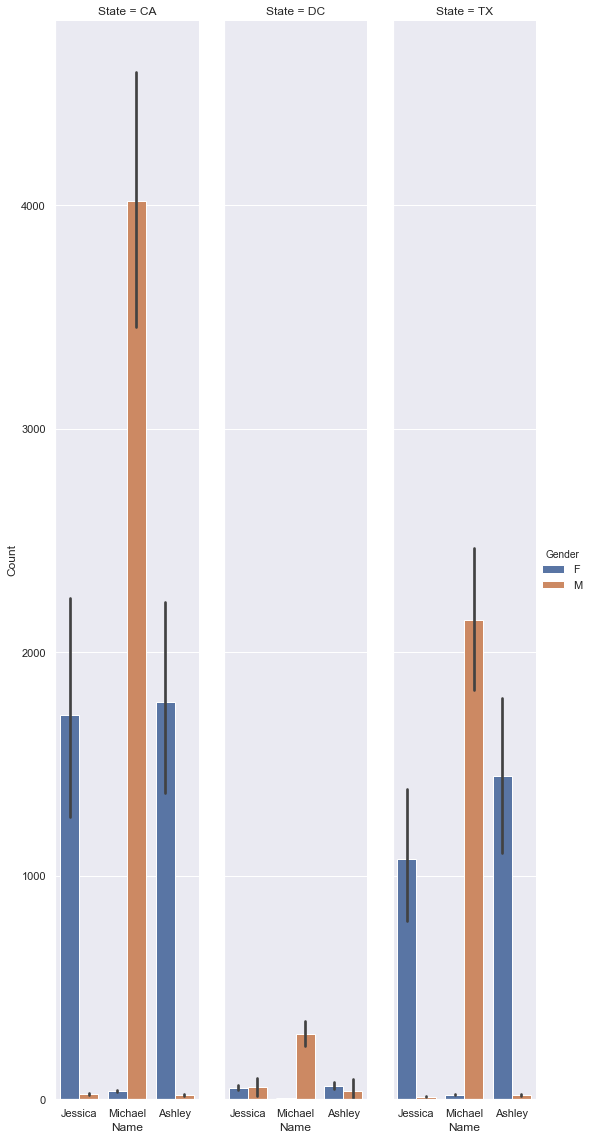

In [33]:
#select 3 states DC,CA,TX
med = df[(df.Year>=1990) & (df.Year<=2000)]
med=med.loc[med['State'].isin(['DC','CA','TX'])]
med = med.groupby(by=['State','Gender','Name']).sum()
med = med.loc[med.groupby(by=['State','Gender'])['Count'].idxmax()].drop(['Year', 'Id'], axis=1)

med.reset_index(inplace=True)  
print(med)


#visualization
g = sns.catplot(x="Name",y="Count",col='State',col_wrap=3, hue="Gender",height=16,kind='bar', aspect=.16,data = names)


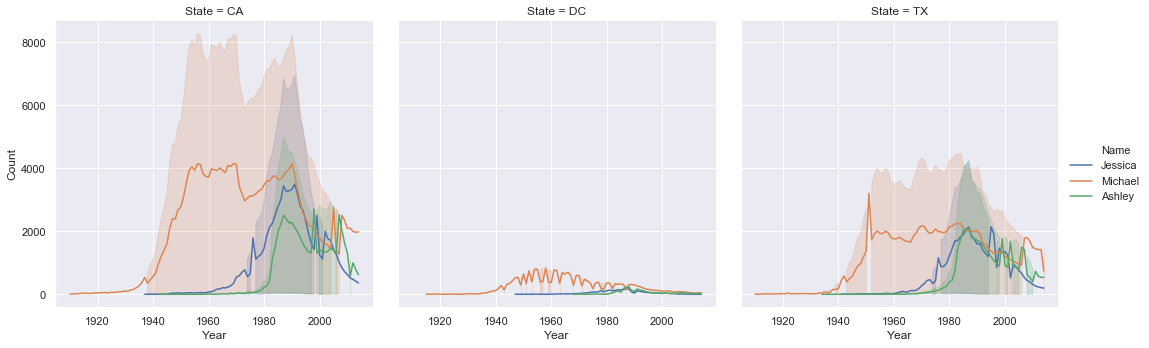

In [34]:
#dynamics of three names Jessica, Michael, Ashley
names=df.loc[df['State'].isin(['DC','CA','TX'])]
names=names.loc[df['Name'].isin(['Jessica','Michael','Ashley'])]

sns.set(rc={'figure.figsize':(12,11)})

g = sns.relplot(x="Year",y="Count", hue="Name",col='State',col_wrap=3,kind='line',data = names)